In [2]:
from util.utils import process_directory

process_directory("Data/rsna-2023-abdominal-trauma-detection-minimal/train_images/10004/21057", "Data/rsna-2023-abdominal-trauma-detection-minimal/train_images/10004/21057-png-nolut", voi_lut=False,og_aspratio=True, resize_to=1024)

In [6]:
from util.utils import generate_mask

masks = generate_mask("data/rsna-2023-abdominal-trauma-detection-minimal/train_images/10004/21057-png-nolut/180.png", output_mode="binary_mask")

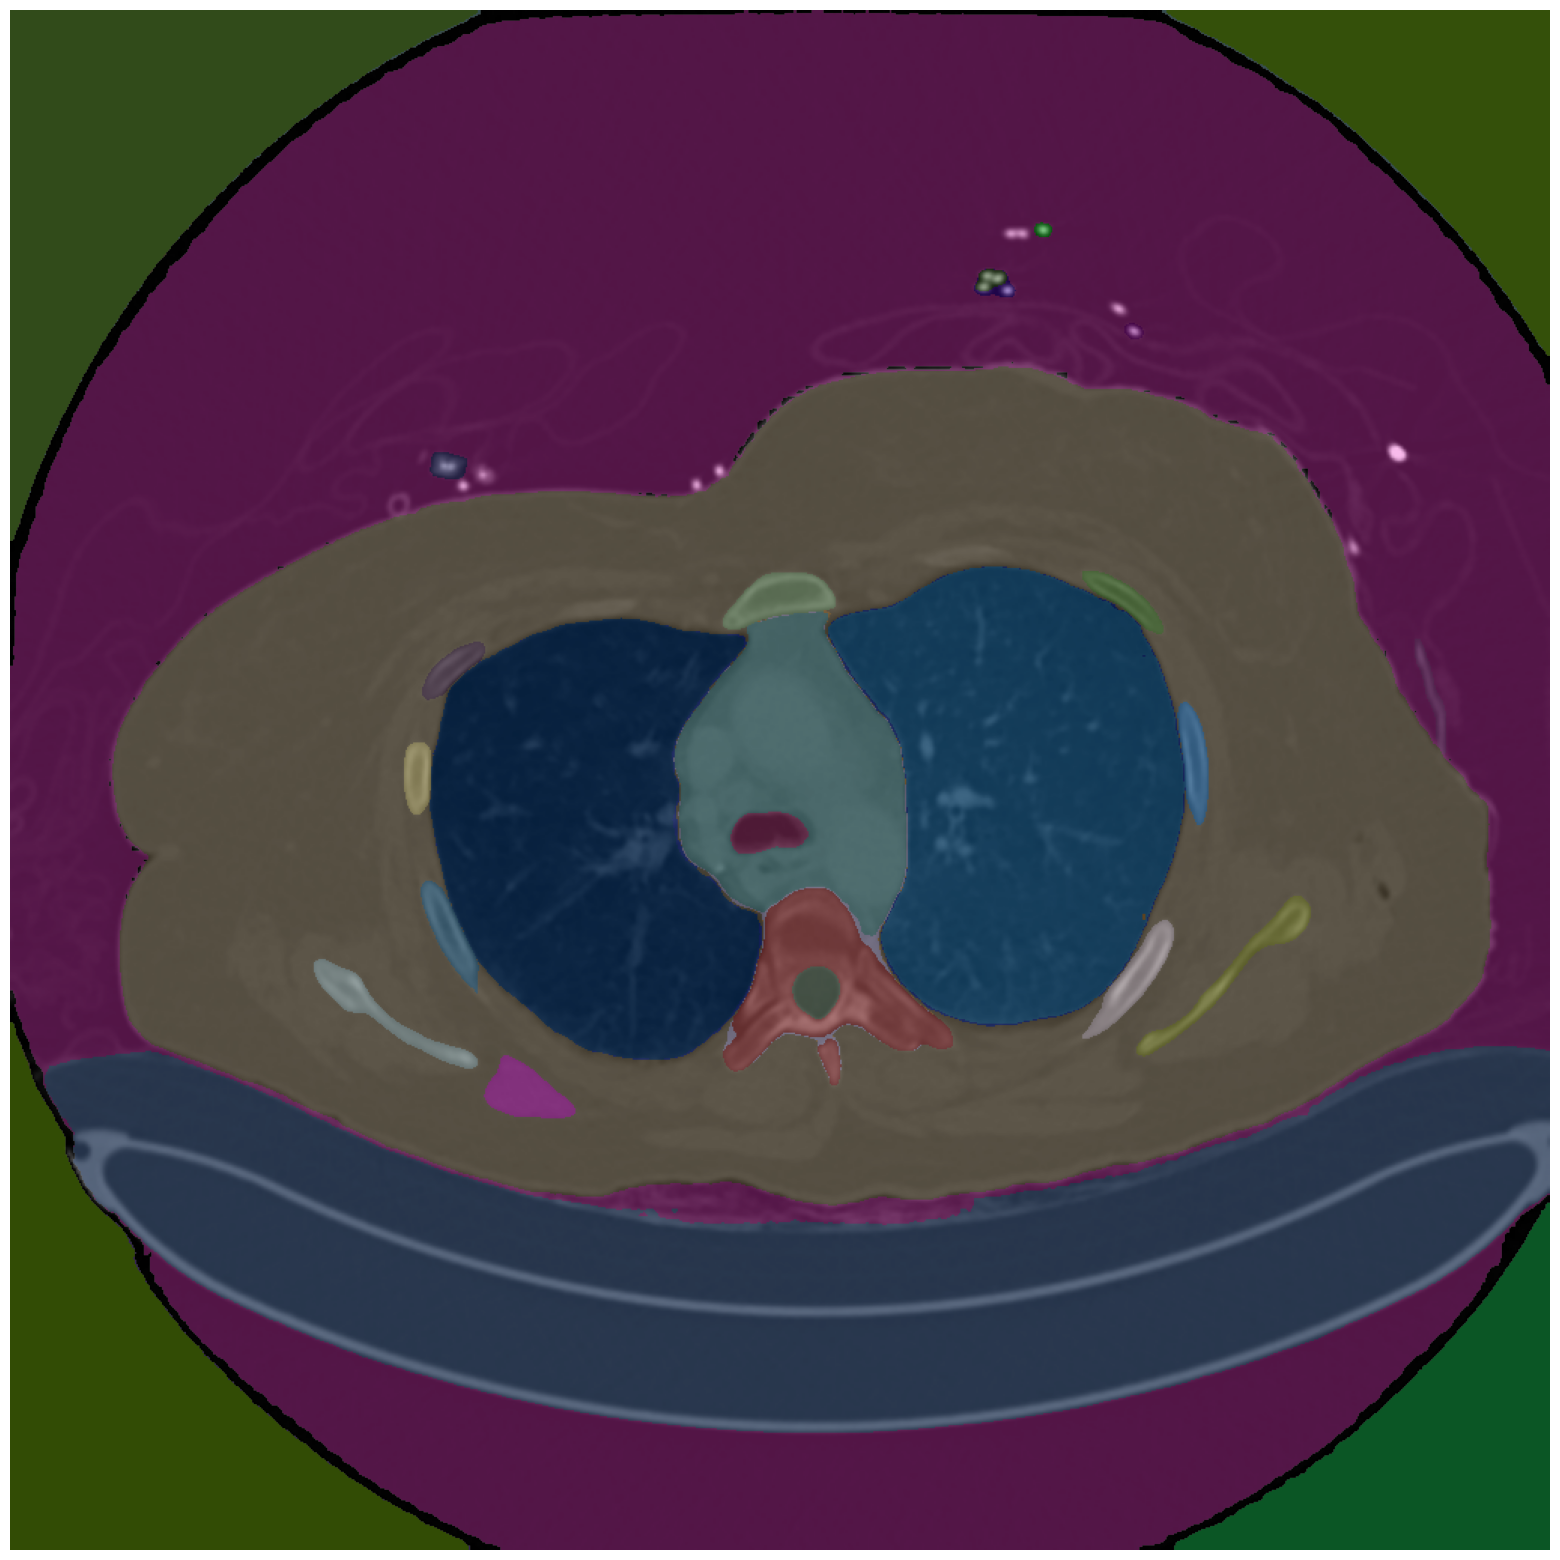

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
image = cv2.imread('Data/rsna-2023-abdominal-trauma-detection-minimal/train_images/10004/21057-png-nolut/180.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 